In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle

% matplotlib inline

In [2]:
T = 100
x_axis = np.linspace(0, 2*np.pi, T)
y_axis = np.sin(x_axis)


In [7]:
N = 30
idx = np.random.choice(T, size=N, replace=False)
Xtrain = x_axis[idx].reshape(N,1)
Ytrain = y_axis[idx]

model = DecisionTreeRegressor()
model.fit(Xtrain, Ytrain)
prediction = model.predict(x_axis.reshape(T,1))
print 'score for 1 tree: {}'.format(model.score(x_axis.reshape(T, 1), y_axis))

score for 1 tree: 0.983661837209


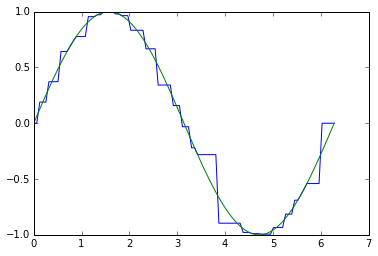

In [10]:
plt.plot(x_axis, prediction)
plt.plot(x_axis, y_axis)
plt.show()

In [23]:
class BaggedTreeRegressor:
    def __init__(self, B):
        self.B = B
        
    def fit(self, X, Y):
        N = len(X)
        self.models = []
        for b in xrange(self.B):
            idx = np.random.choice(N, size=N, replace=True)
            Xb = X[idx]
            Yb = Y[idx]
            
            model = DecisionTreeRegressor()
            model.fit(Xb, Yb)
            self.models.append(model)
            
    def predict(self, X):
        predictions = np.zeros(len(X))
        for model in self.models:
            predictions += model.predict(X)
        return predictions / self.B
    
    def score(self, X, Y):
        d1 = Y - self.predict(X)
        d2 = Y - Y.mean()
        return 1 - d1.dot(d1) / d2.dot(d2)
    
    

In [25]:
model = BaggedTreeRegressor(200)
model.fit(Xtrain, Ytrain)
print "score for bagged tree: {}".format(model.score(x_axis.reshape(T, 1), y_axis))

score for bagged tree: 0.994337903111


In [26]:
prediction = model.predict(x_axis.reshape(T, 1))

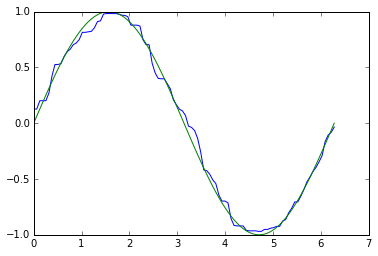

In [27]:
plt.plot(x_axis, prediction)
plt.plot(x_axis, y_axis)
plt.show()